# Problem

**Objective**: Determine how interventions impact sales performance and satisfaction.

Possible expansion: Compare results of complete data (no missing entries), modified data (imputation of missing entries), and sparse data (dropped missing entries).

# Imports

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# data without missing entries
file_path = "Sales_without_NaNs_v1.3.csv"
df = pd.read_csv(file_path)
df.head()

,Group,Customer_Segment,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After,Purchase_Made
0,Control,High Value,240.548359,300.007568,74.684767,74.093658,No
1,Treatment,High Value,246.862114,381.337555,100.000000,100.000000,Yes
2,Control,High Value,156.978084,179.330464,98.780735,100.000000,No
3,Control,Medium Value,192.126708,229.278031,49.333766,39.811841,Yes
4,Control,High Value,229.685623,270.167701,83.974852,87.738591,Yes


# EDA

## Data Cleaning

In [61]:
print(f"Number of Rows/Entries: {df.shape[0]}")
print(f"Number of Columns/Variables: {df.shape[1]}")
print(df.columns)

Number of Rows/Entries: 10000
Number of Columns/Variables: 7
Index(['Group', 'Customer_Segment', 'Sales_Before', 'Sales_After',
       'Customer_Satisfaction_Before', 'Customer_Satisfaction_After',
       'Purchase_Made'],
      dtype='object')


In [14]:
df.isna().sum()

Group                           0
Customer_Segment                0
Sales_Before                    0
Sales_After                     0
Customer_Satisfaction_Before    0
Customer_Satisfaction_After     0
Purchase_Made                   0
dtype: int64

In [15]:
display(df.describe())

,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,203.846220,280.378330,70.249026,73.921449
std,55.431215,85.463933,16.927639,18.185050
min,24.852966,32.414352,22.202441,18.224938
25%,166.610755,221.438134,56.348229,59.866027
50%,203.347924,273.599150,69.644307,73.708858
75%,239.220116,332.376500,83.318174,90.403099
max,545.422547,818.219997,100.000000,100.000000


## Visualization

Satisfaction vs. Sales 
- the cluster slightly shift to the right, which implies increase in sales

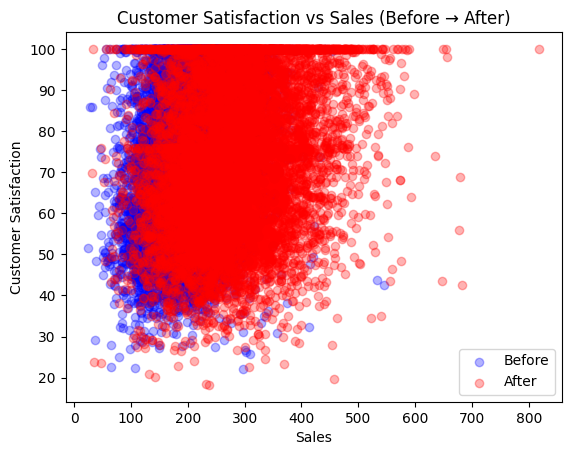

In [16]:
# Scatter "before"
plt.scatter(df["Sales_Before"], df["Customer_Satisfaction_Before"], 
            color="blue", label="Before", alpha=0.3)

# Scatter "after"
plt.scatter(df["Sales_After"], df["Customer_Satisfaction_After"], 
            color="red", label="After", alpha=0.3)

plt.xlabel("Sales")
plt.ylabel("Customer Satisfaction")
plt.title("Customer Satisfaction vs Sales (Before → After)")
plt.legend()
plt.show()

Sales vs. Purchase made
- not very sure how can purchase made = No but still have Sales After

In [37]:
df[['Purchase_Made', 'Sales_Before', 'Sales_After']]

,Purchase_Made,Sales_Before,Sales_After
0,No,240.548359,300.007568
1,Yes,246.862114,381.337555
2,No,156.978084,179.330464
3,Yes,192.126708,229.278031
4,Yes,229.685623,270.167701
...,...,...,...
9995,No,259.695935,415.181694
9996,Yes,186.488285,216.225457
9997,No,208.107142,322.893351
9998,No,267.772651,431.974901


values vs sales

- the shift of medium sales are similar across all guests
- 

<Figure size 600x400 with 0 Axes>

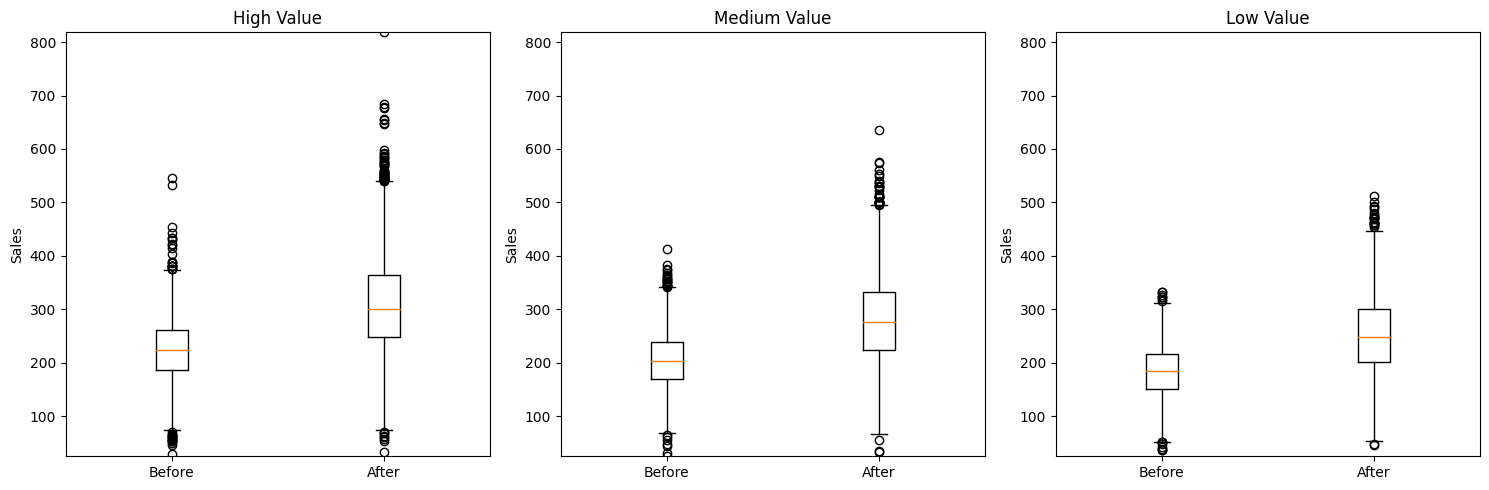

In [33]:
high_values = df[df['Customer_Segment'] == 'High Value']
high_values_before = high_values['Sales_Before'] # [[ ]] gives data frame, [] gives series that can be used in box
high_values_after = high_values['Sales_After']

medium_values = df[df['Customer_Segment'] == 'Medium Value']
medium_values_before = medium_values['Sales_Before']
medium_values_after = medium_values['Sales_After']

low_values = df[df['Customer_Segment'] == 'Low Value']
low_values_before = low_values['Sales_Before']
low_values_after = low_values['Sales_After']

plt.figure(figsize=(6,4))
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].boxplot([high_values_before, high_values_after], labels=["Before", "After"])
axs[0].set_title('High Value')
axs[0].set_ylabel('Sales')

axs[1].boxplot([medium_values_before, medium_values_after], labels=["Before", "After"])
axs[1].set_title('Medium Value')
axs[1].set_ylabel('Sales')

axs[2].boxplot([low_values_before, low_values_after], labels=["Before", "After"])
axs[2].set_title('Low Value')
axs[2].set_ylabel('Sales')

# Find global min/max across all sales values
all_sales = pd.concat([
    high_values_before, high_values_after,
    medium_values_before, medium_values_after,
    low_values_before, low_values_after
])
ymin, ymax = all_sales.min(), all_sales.max()

# Apply the same y-axis limits to all subplots
for ax in axs:
    ax.set_ylim(ymin, ymax)

plt.tight_layout()
plt.show()


Group vs. Sales
- no significant different for both groups before tratment
- medium increased after for treatment group
- more higher percentile sales for treatment group after intervention

<Figure size 600x400 with 0 Axes>

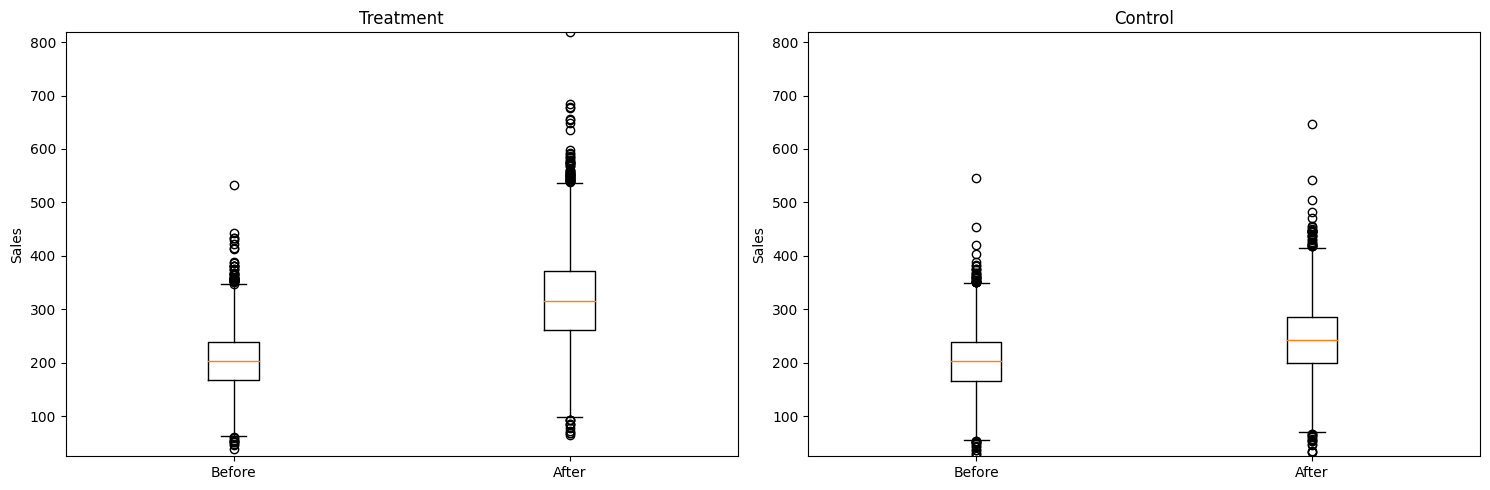

In [38]:
treatment = df[df['Group'] == 'Treatment']
treatment_before = treatment['Sales_Before'] # [[ ]] gives data frame, [] gives series that can be used in box
treatment_after = treatment['Sales_After']

control = df[df['Group'] == 'Control']
control_before = control['Sales_Before']
control_after = control['Sales_After']

plt.figure(figsize=(6,4))
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].boxplot([treatment_before, treatment_after], labels=["Before", "After"])
axs[0].set_title('Treatment')
axs[0].set_ylabel('Sales')

axs[1].boxplot([control_before, control_after], labels=["Before", "After"])
axs[1].set_title('Control')
axs[1].set_ylabel('Sales')

# Find global min/max across all sales values
all_sales = pd.concat([
    treatment_before, treatment_after,
    control_before, control_after
])
ymin, ymax = all_sales.min(), all_sales.max()

# Apply the same y-axis limits to all subplots
for ax in axs:
    ax.set_ylim(ymin, ymax)

plt.tight_layout()
plt.show()


# Hypothesis Test
### Goal : Is intervention increasing Sales? Is intervention inceasing Customer Satisfcation? 

### Sales
- 2 sample Z-test : sample > 30
- H0 : Intervention has no impact on Sales for treatment group
- H1 : Intervention impacted Sales for treatment group
- Hypothesis : mu_treatment - mu_control = 0

In [ ]:
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest as ztest

#treatment
a = df[df['Group'] == 'Treatment']['Sales_After']

#control 
b = df[df['Group'] == 'Control']['Sales_After']

z_stat, p_value = ztest(a, b, value=0)

print("Z-statistic:", z_stat)
print("P-value:", p_value)
print(np.mean(a), np.mean(b))

Z-statistic: 49.070074902719654
P-value: 0.0
318.12628180144907 242.8261579296649


A two-sample z-test was conducted to compare post-intervention sales between the Treatment and Control groups. Results indicate a statistically significant difference in average sales (Z = 49.07, p < 0.001). The Treatment group’s mean sales (M = 318.13) were substantially higher than the Control group’s (M = 242.83), suggesting that the intervention had a strong positive effect.

### Satisfaction
- 2 sample T test
- H0 : Intervention has no impact on Satisfaction for treatment group
- H1 : Intervention impacted Satisfaction for treatment group
- Hypothesis : mu_treatment - mu_control = 0

In [107]:
from scipy.stats import ttest_rel

t, p = ttest_rel(df["Customer_Satisfaction_After"], df["Customer_Satisfaction_Before"])
print(f"Paired t-test (Satisfaction After vs Before):\nt = {t:.3f}\np = {p:.3e}")

Paired t-test (Satisfaction After vs Before):
t = 36.731
p = 3.463e-277


# Binary Prediction
### Goal : Is intervention help with purchase made?

### Logistic Regression
I also tried other similar models such as XGBoost, random forest. However, the accuracy is all around 50%.

Train Accuracy: 0.503375
Test Accuracy: 0.5085


<Axes: >

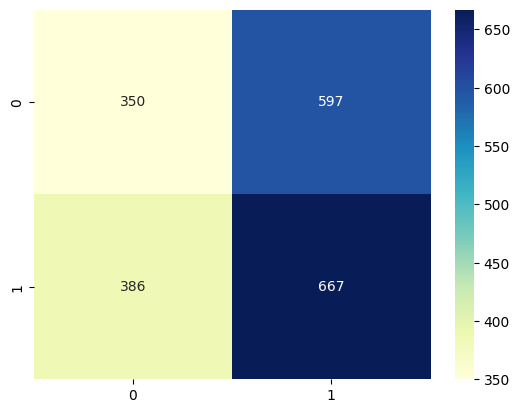

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics

X = df[['Customer_Segment', 'Group', 'Sales_Before', 'Customer_Satisfaction_Before']] # before data only
y = df['Purchase_Made'].map({'Yes':1, 'No':0})  

categorical = ['Customer_Segment', 'Group']
numeric = ['Sales_Before', 'Customer_Satisfaction_Before']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical),
        ('num', 'passthrough', numeric) # standardize 
    ]
)
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Train Accuracy:", model.score(X_train, y_train))
print("Test Accuracy:", model.score(X_test, y_test))

matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')


## K Means Clustering
### Goal : What kind of guests are getting impacted the most?

Train cluster distribution: 0    2825
1    2712
2    2463
Name: count, dtype: int64
Test cluster distribution: 0    702
1    690
2    608
Name: count, dtype: int64


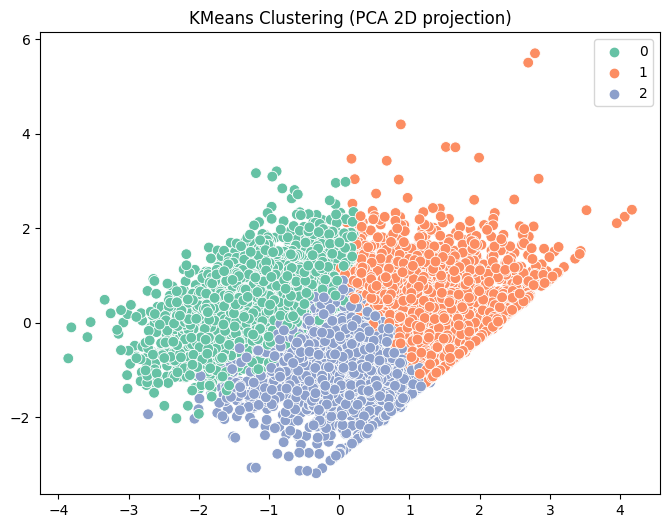

In [109]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

X = df[['Customer_Segment', 'Group', 'Sales_Before', 'Customer_Satisfaction_Before']]

categorical = ['Customer_Segment', 'Group']
numeric = ['Sales_Before', 'Customer_Satisfaction_Before']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop="first"), categorical),
        ('num', StandardScaler(), numeric)
    ]
)

kmeans = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('cluster', KMeans(n_clusters=3, random_state=42))
])

X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
kmeans.fit(X_train)

train_clusters = kmeans.predict(X_train)
test_clusters = kmeans.predict(X_test)

print("Train cluster distribution:", pd.Series(train_clusters).value_counts())
print("Test cluster distribution:", pd.Series(test_clusters).value_counts())

# ====== Plot (only works if we reduce to 2D) ======
# Use PCA for visualization
from sklearn.decomposition import PCA

X_processed = preprocessor.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

clusters = kmeans.named_steps['cluster'].fit_predict(X_processed)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette="Set2", s=60)
plt.title("KMeans Clustering (PCA 2D projection)")
plt.show()


In [110]:
clusters = kmeans.named_steps['cluster'].labels_
df_clustered = df.copy()
df_clustered['Cluster'] = clusters
print(df_clustered['Cluster'].value_counts())

Cluster
0    3531
2    3390
1    3079
Name: count, dtype: int64


### Cluter 1 has the highest sales and customer satisfaction, Cluster 0 has slightly higher sales than Cluster 2, but much lower customer satisfaction than Cluster 2

Clusters are grouped based on similar before sales & satisfaction. But after intervention, the after sales & satisfaction changed a lot more than control group.

- Cluster 0 = High Sale, High Satisfaction
- Cluster 1 = Medium Sale, Low Satisfaction
- Cluster 2 = Medium Sale, Medium Satisfaction

In [111]:
cluster_summary = df_clustered.groupby(['Cluster', 'Group'])[['Sales_Before', 'Sales_After', 'Customer_Satisfaction_Before', 'Customer_Satisfaction_After']].mean()
cluster_summary

Sales_Before  Sales_After  Customer_Satisfaction_Before  \
Cluster Group                                                                
0       Control      181.708250   217.409947                     53.075519   
        Treatment    183.085603   284.898389                     52.872039   
1       Control      258.848953   309.252488                     83.699997   
        Treatment    262.594915   407.478564                     83.212120   
2       Control      173.098957   207.269132                     76.313009   
        Treatment    176.006167   273.833845                     76.174088   

                   Customer_Satisfaction_After  
Cluster Group                                   
0       Control                      57.375931  
        Treatment                    56.939420  
1       Control                      86.134376  
        Treatment                    86.142327  
2       Control                      80.471182  
        Treatment                    80.106419

Control and Treatment groups are divided very evenly within each group. 
- Cluster 0 are dominated by Low Value
- Cluster 1 are dominated by High Value
- Cluster 2 are dominated by Medium Value

In [112]:
cluster_categorical = df_clustered.groupby('Cluster')[['Customer_Segment', 'Group']].value_counts(normalize=True)
print(cluster_categorical)

Cluster  Customer_Segment  Group    
0        Low Value         Control      0.462758
                           Treatment    0.462192
         Medium Value      Treatment    0.031436
                           Control      0.028037
         High Value        Treatment    0.008496
                           Control      0.007080
1        High Value        Control      0.348490
                           Treatment    0.326080
         Medium Value      Treatment    0.153946
                           Control      0.150698
         Low Value         Control      0.011692
                           Treatment    0.009094
2        Medium Value      Treatment    0.326549
                           Control      0.324484
         High Value        Treatment    0.173451
                           Control      0.168437
         Low Value         Treatment    0.003835
                           Control      0.003245
Name: proportion, dtype: float64


In [113]:
df_clustered.groupby(['Cluster','Customer_Segment', 'Group']).mean(numeric_only=True)

Sales_Before  Sales_After  \
Cluster Customer_Segment Group                                  
0       High Value       Control      190.054950   228.601489   
                         Treatment    178.443923   275.059333   
        Low Value        Control      180.752365   216.129848   
                         Treatment    182.357129   283.705161   
        Medium Value     Control      195.377429   235.711906   
                         Treatment    195.050641   305.101277   
1       High Value       Control      255.564536   305.246452   
                         Treatment    260.810717   404.734589   
        Low Value        Control      273.275869   326.947668   
                         Treatment    277.329413   430.072162   
        Medium Value     Control      265.324839   317.143544   
                         Treatment    265.503712   411.956052   
2       High Value       Control      164.905357   198.212350   
                         Treatment    168.689279   263.406617   
        Low Value        Control      115.220315   136.610735   
                         Treatment    143.347894   225.978308   
        Medium Value     Control      177.930966   212.677008   
                         Treatment    180.276165   279.934416   

                                    Customer_Satisfaction_Before  \
Cluster Customer_Segment Group                                     
0       High Value       Control                       55.671589   
                         Treatment                     50.895461   
        Low Value        Control                       53.322347   
                         Treatment                     53.139396   
        Medium Value     Control                       48.346031   
                         Treatment                     49.475390   
1       High Value       Control                       88.767815   
                         Treatment                     88.693167   
        Low Value        Control                       67.955547   
                         Treatment                     66.822165   
        Medium Value     Control                       73.202220   
                         Treatment                     72.570661   
2       High Value       Control                       85.618211   
                         Treatment                     85.541299   
        Low Value        Control                       74.977205   
                         Treatment                     74.651508   
        Medium Value     Control                       71.496122   
                         Treatment                     71.216431   

                                    Customer_Satisfaction_After  
Cluster Customer_Segment Group                                   
0       High Value       Control                      68.058981  
                         Treatment                    65.734758  
        Low Value        Control                      57.244650  
                         Treatment                    56.903728  
        Medium Value     Control                      56.844980  
                         Treatment                    55.087069  
1       High Value       Control                      90.271240  
                         Treatment                    90.993870  
        Low Value        Control                      68.831218  
                         Treatment                    65.684142  
        Medium Value     Control                      77.910363  
                         Treatment                    77.074564  
2       High Value       Control                      89.321733  
                         Treatment                    88.407753  
        Low Value        Control                      63.695155  
                         Treatment                    66.038556  
        Medium Value     Control                      76.044701  
                         Treatment                    75.862243

In [114]:
df_clustered.groupby(['Cluster', 'Customer_Segment']).size()
df_clustered.groupby(['Cluster', 'Group']).size()

Cluster  Group    
0        Control      1758
         Treatment    1773
1        Control      1573
         Treatment    1506
2        Control      1682
         Treatment    1708
dtype: int64

### Which cluster of guests performed the best after intervention?
- Since we are considering intervention, exclude control group in this investigation

In [115]:
clustered_treatment = (
    df_clustered[df_clustered['Group'] == 'Treatment']
    .groupby(['Cluster', 'Customer_Segment'])[['Sales_Before', 'Sales_After',
                                               'Customer_Satisfaction_Before', 
                                               'Customer_Satisfaction_After']]
    .mean()
)

clustered_treatment = clustered_treatment.reset_index()
clustered_treatment


,Cluster,Customer_Segment,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After
0,0,High Value,178.443923,275.059333,50.895461,65.734758
1,0,Low Value,182.357129,283.705161,53.139396,56.903728
2,0,Medium Value,195.050641,305.101277,49.475390,55.087069
3,1,High Value,260.810717,404.734589,88.693167,90.993870
4,1,Low Value,277.329413,430.072162,66.822165,65.684142
5,1,Medium Value,265.503712,411.956052,72.570661,77.074564
6,2,High Value,168.689279,263.406617,85.541299,88.407753
7,2,Low Value,143.347894,225.978308,74.651508,66.038556
8,2,Medium Value,180.276165,279.934416,71.216431,75.862243


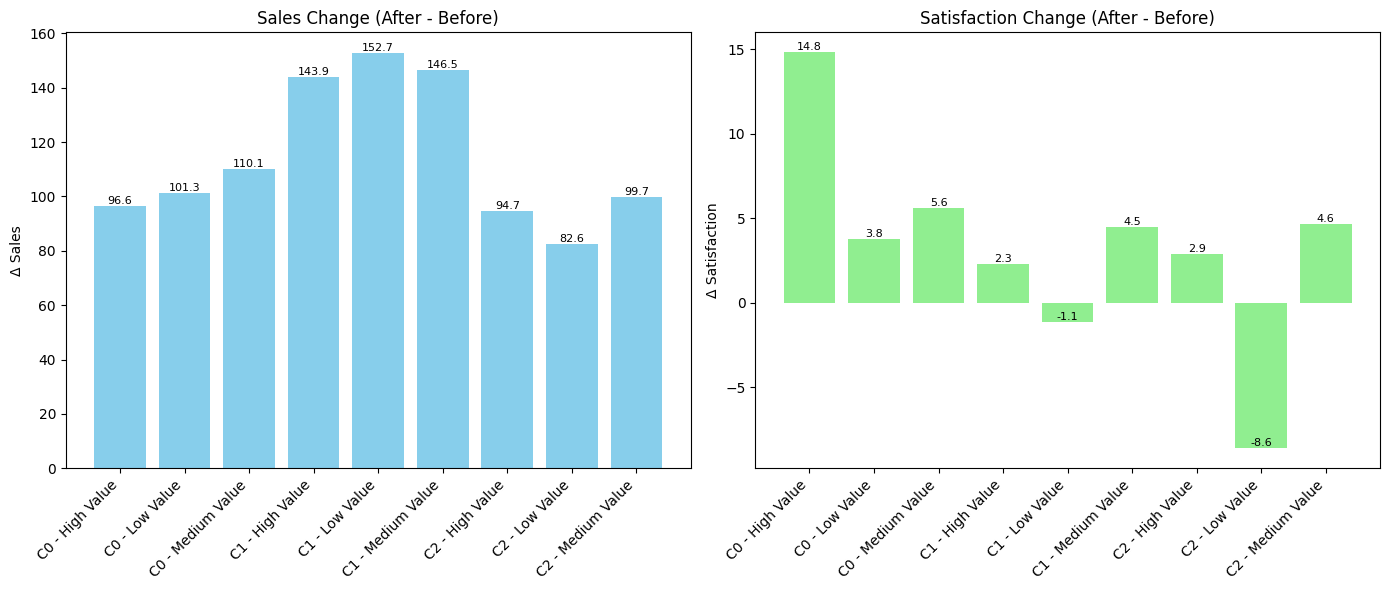

In [116]:
clustered_treatment['Sales_Delta'] = clustered_treatment['Sales_After'] - clustered_treatment['Sales_Before']
clustered_treatment['Satisfaction_Delta'] = clustered_treatment['Customer_Satisfaction_After'] - clustered_treatment['Customer_Satisfaction_Before']
clustered_treatment_reset = clustered_treatment.reset_index()

fig, axes = plt.subplots(1, 2, figsize=(14,6))

# ---- Sales Delta ----
bars1 = axes[0].bar(
    x=range(len(clustered_treatment_reset)),
    height=clustered_treatment_reset['Sales_Delta'],
    color="skyblue"
)

axes[0].set_title("Sales Change (After - Before)")
axes[0].set_ylabel("Δ Sales")
axes[0].set_xticks(range(len(clustered_treatment_reset)))
axes[0].set_xticklabels(
    clustered_treatment_reset[['Cluster','Customer_Segment']].apply(lambda x: f"C{x['Cluster']} - {x['Customer_Segment']}", axis=1),
    rotation=45, ha='right'
)

# Label values on top
for bar in bars1:
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{bar.get_height():.1f}", 
                 ha='center', va='bottom', fontsize=8)


# ---- Satisfaction Delta ----
bars2 = axes[1].bar(
    x=range(len(clustered_treatment_reset)),
    height=clustered_treatment_reset['Satisfaction_Delta'],
    color="lightgreen"
)

axes[1].set_title("Satisfaction Change (After - Before)")
axes[1].set_ylabel("Δ Satisfaction")
axes[1].set_xticks(range(len(clustered_treatment_reset)))
axes[1].set_xticklabels(
    clustered_treatment_reset[['Cluster','Customer_Segment']].apply(lambda x: f"C{x['Cluster']} - {x['Customer_Segment']}", axis=1),
    rotation=45, ha='right'
)

# Label values on top
for bar in bars2:
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{bar.get_height():.1f}", 
                 ha='center', va='bottom', fontsize=8)


plt.tight_layout()
plt.show()


- C1 being the highest Sales group also have the highest increase for more than 143 in Sales, Low Value has the highest increase. However Satisfaction increased for less than 5 for high and medium value, and decreased by 1 for low value group
- C2 has increase in Sales for around 90, Medium value has the highest increase and Low value has the lowest. However, Low value has 8.6 decrease in satisfaction
- C0 Medium value has the highest Sales increase for 110, whereas High value has the highest satisfaction increase for around 15

### CONCLUSION 
- To increase sales, invest on C1, C0 Medium > C2 Medium > C0 others > C2 others
- To increase customer satisfaction, invest on C0 High, don't do C1 Low and C2 Low
- Low Values generally have low increase in Customer Satisfaction
- C0 generally have increase in Customer Satisfaction
- Intervention improve all clusters/values in Sales

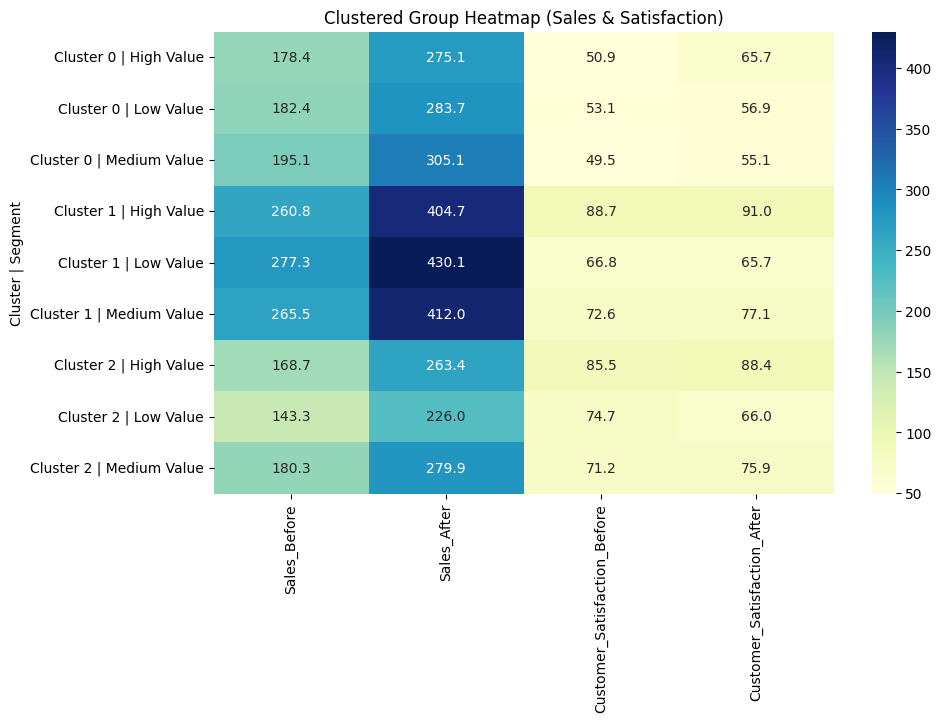

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only relevant cols
heatmap_data = clustered_treatment[['Sales_Before','Sales_After',
                                    'Customer_Satisfaction_Before','Customer_Satisfaction_After']].copy()

# Build a combined index: Cluster + Customer Segment
heatmap_data.index = clustered_treatment.apply(
    lambda row: f"Cluster {row['Cluster']} | {row['Customer_Segment']}", axis=1
)

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", cbar=True)
plt.title("Clustered Group Heatmap (Sales & Satisfaction)")
plt.ylabel("Cluster | Segment")
plt.show()